# Minimal example for TensorFlow
## In this notebook we will recreate our machine learning algorithm using TF2.16

# Import the libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Data generation

In [40]:
obs = 1000
xs = np.random.uniform(low=-10,high=10,size=(obs,1))
zs = np.random.uniform(-10,10,(obs,1))
generated_inpts = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(obs,1))
generated_trgts = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro',inputs=generated_inpts, targets=generated_trgts)

# Solving with TensorFlow

In [41]:
training_data = np.load('TF_intro.npz')
input_size = 2
output_size = 1
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),#we specify the weigths
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1) #we specify the noises
                                                 )
])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02) #we specify the learning rate of our machine learning algorithm
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)#If you set the verbose value to 0, then no output will be displayed. If instead you set it to 1 then it will display a progress bar. But if instead you set it to 2 then i rill display a line per epoch

Epoch 1/100
32/32 - 0s - 8ms/step - loss: 34.2871
Epoch 2/100
32/32 - 0s - 2ms/step - loss: 1.1881
Epoch 3/100
32/32 - 0s - 2ms/step - loss: 0.4004
Epoch 4/100
32/32 - 0s - 2ms/step - loss: 0.3783
Epoch 5/100
32/32 - 0s - 2ms/step - loss: 0.4113
Epoch 6/100
32/32 - 0s - 2ms/step - loss: 0.3722
Epoch 7/100
32/32 - 0s - 2ms/step - loss: 0.4315
Epoch 8/100
32/32 - 0s - 2ms/step - loss: 0.3585
Epoch 9/100
32/32 - 0s - 2ms/step - loss: 0.3954
Epoch 10/100
32/32 - 0s - 2ms/step - loss: 0.3859
Epoch 11/100
32/32 - 0s - 2ms/step - loss: 0.3809
Epoch 12/100
32/32 - 0s - 2ms/step - loss: 0.3517
Epoch 13/100
32/32 - 0s - 2ms/step - loss: 0.3640
Epoch 14/100
32/32 - 0s - 2ms/step - loss: 0.3656
Epoch 15/100
32/32 - 0s - 2ms/step - loss: 0.3448
Epoch 16/100
32/32 - 0s - 2ms/step - loss: 0.3746
Epoch 17/100
32/32 - 0s - 2ms/step - loss: 0.3499
Epoch 18/100
32/32 - 0s - 2ms/step - loss: 0.3600
Epoch 19/100
32/32 - 0s - 2ms/step - loss: 0.3599
Epoch 20/100
32/32 - 0s - 2ms/step - loss: 0.3441
Epoch 21

# Extract the weight and bias

In [42]:
model.layers[0].get_weights()
weights = model.layers[0].get_weights()[0]
print('weight: ',weights)
bias = model.layers[0].get_weights()[1]
print('bias: ',bias)

weight:  [[ 1.8741895]
 [-2.9834871]]
bias:  [4.9983273]


# Extract the outputs (make predictions)

In [43]:
model.predict_on_batch(training_data['inputs']).round(1)                     

array([[-14.9],
       [-30.1],
       [ 20.3],
       [ 31.2],
       [  9. ],
       [-22.2],
       [ -1.9],
       [ 12.6],
       [-17.8],
       [ 21.9],
       [ 26.9],
       [-18.2],
       [ 15.9],
       [-11. ],
       [ 43.1],
       [-26. ],
       [ -4.1],
       [  4.2],
       [ -1.2],
       [ 42.9],
       [ 26.5],
       [ 21.2],
       [ 13. ],
       [ 18.3],
       [ 11.2],
       [-27.1],
       [ 46.3],
       [ 52.2],
       [ -5.8],
       [-16.6],
       [ 46. ],
       [ 12.9],
       [ 32.3],
       [ 23.4],
       [-13.8],
       [-13.2],
       [ 31.6],
       [ 23.8],
       [  5.3],
       [-18.3],
       [-40.6],
       [ 22.4],
       [-12.4],
       [-21.1],
       [ 38.5],
       [  0.3],
       [ 28.5],
       [ 21.7],
       [-19.2],
       [-13.8],
       [  1.3],
       [ 28.1],
       [ 43.5],
       [ 19.9],
       [ 35.6],
       [ 20.8],
       [-13.9],
       [ 19.8],
       [  8.2],
       [ 29.6],
       [ -9.6],
       [-10.8],
       [

In [44]:
training_data['targets'].round(1)

array([[-16. ],
       [-31.1],
       [ 20.2],
       [ 31.4],
       [  9.9],
       [-22.5],
       [ -3. ],
       [ 14.1],
       [-19.1],
       [ 23.4],
       [ 28.4],
       [-18.4],
       [ 17.5],
       [-11.7],
       [ 43.6],
       [-26.4],
       [ -5.5],
       [  3.9],
       [ -1.2],
       [ 43. ],
       [ 27.8],
       [ 21.2],
       [ 14. ],
       [ 17.5],
       [ 10.4],
       [-27.5],
       [ 46.6],
       [ 52.8],
       [ -5.4],
       [-15.8],
       [ 47.5],
       [ 11.3],
       [ 33.4],
       [ 23.3],
       [-13.8],
       [-13.7],
       [ 31.7],
       [ 25.3],
       [  5.1],
       [-18.1],
       [-42.1],
       [ 22.1],
       [-12.5],
       [-22. ],
       [ 39.3],
       [ -0.5],
       [ 28.4],
       [ 21.9],
       [-20. ],
       [-12.6],
       [ -0.6],
       [ 28.5],
       [ 45.3],
       [ 18.9],
       [ 35.4],
       [ 20.8],
       [-14.7],
       [ 19.9],
       [  8.7],
       [ 29.1],
       [ -9.8],
       [-11.5],
       [

# Plotting the data

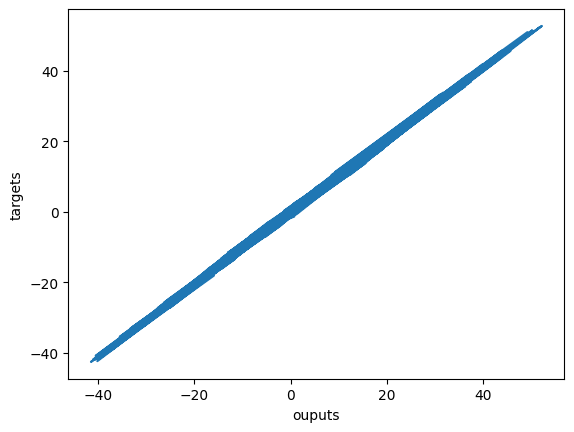

In [45]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('ouputs')
plt.ylabel('targets')
plt.show()